In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

df = pd.read_csv("/content/drive/MyDrive/Customer_Segmentation_VN.csv")


In [ ]:
data = df.loc[:, ['longtitude', 'latitude']]

In [ ]:
scaler = MinMaxScaler()

data = scaler.fit_transform(data)


In [ ]:
df = df.drop(columns=['Age'])
df = df.drop(columns=['CustomerID'])
df = df.drop(columns=['Gender'])

In [ ]:
df

,Annual Income (k$),Spending Score (1-100)
0,15.0,39.0
1,15.0,81.0
2,16.0,6.0
3,16.0,77.0
4,17.0,40.0
...,...,...
195,120.0,79.0
196,126.0,28.0
197,126.0,74.0
198,137.0,18.0


Text(0.5, 1.0, 'Annual Income (k$)')

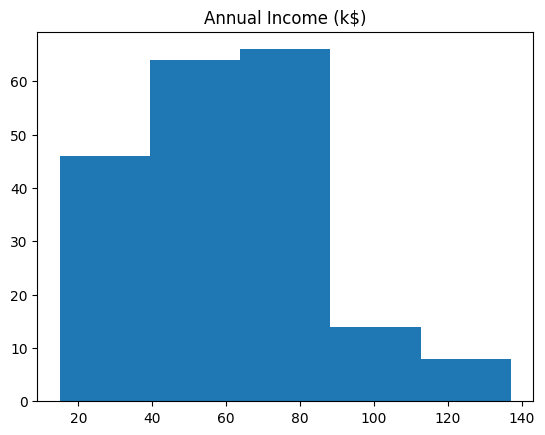

In [ ]:
plt.hist(df['Annual Income (k$)'], bins = 5)
plt.title("Annual Income (k$)")

Text(0.5, 1.0, 'Spending Score (1-100)')

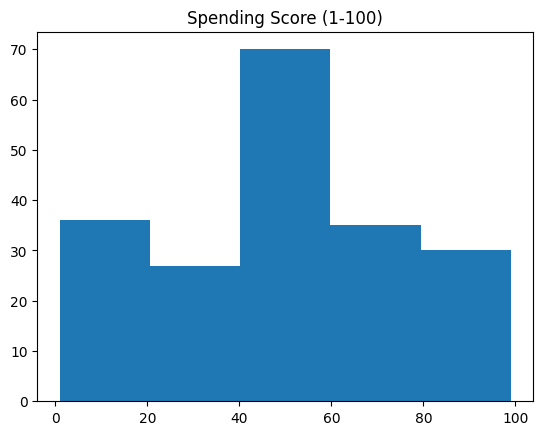

In [ ]:
plt.hist(df['Spending Score (1-100)'], bins = 5)
plt.title("Spending Score (1-100)")

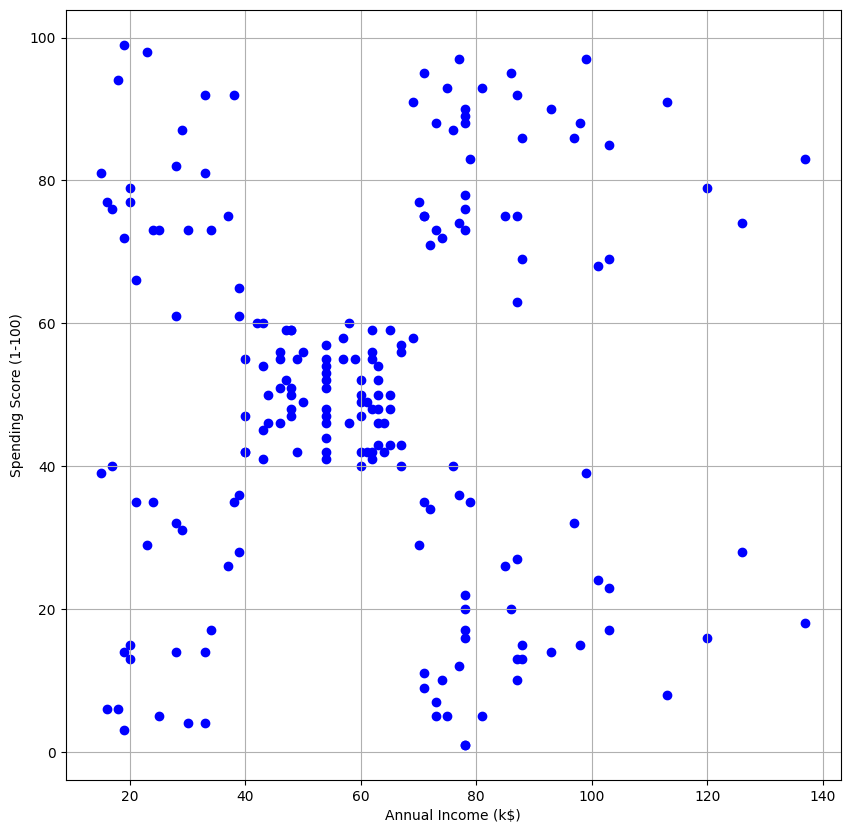

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))


# Tạo dữ liệu cho biểu đồ 3D
x = df['Annual Income (k$)']
y = df['Spending Score (1-100)']

# Vẽ biểu đồ 3D
plt.scatter(x, y, c='blue')

# Thêm nhãn cho các trục
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Hiển thị biểu đồ
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
temp = scaler.fit_transform(df)

df['Annual Income (k$)'] = temp[:,0]
df['Spending Score (1-100)'] = temp[:,1]

In [ ]:
def initiate_centroids(k, dset):
    '''
    Select k data points as centroids
    k: number of centroids
    dset: pandas dataframe
    '''
    centroids = dset.sample(k)
    return centroids

In [ ]:
def rsserr(a,b):
    '''
    Calculate the root of sum of squared errors. 
    a and b are numpy arrays
    '''
    return np.sqrt(np.square(np.sum((a-b)**2)))

In [ ]:
def centroid_assignation(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `centroids`, we assign each
    data point in `dset` to a centroid. 
    - dset - pandas dataframe with observations
    - centroids - pa das dataframe with centroids
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid = np.argmin(all_errors)
        nearest_centroid_error = np.min(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

In [ ]:
def kmeans(dset, k=2, tol=1e-4):
    '''
    K-means implementationd for a 
    `dset`:  DataFrame with observations
    `k`: number of clusters, default k=2
    `tol`: tolerance=1E-4
    '''
    # Let us work in a copy, so we don't mess the original
    working_dset = dset.copy()
    # We define some variables to hold the error, the 
    # stopping signal and a counter for the iterations
    err = []
    goahead = True
    j = 0
    
    # Step 2: Initiate clusters by defining centroids 
    centroids = initiate_centroids(k, dset)

    while(goahead):
        start = time.time()
        # Step 3 and 4 - Assign centroids and calculate error
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids) 
        err.append(sum(j_err))
        
        # Step 5 - Update centroid position
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

        # Step 6 - Restart the iteration
        if j>0:
            # Is the error less than a tolerance (1E-4)
            if err[j-1]-err[j]<=tol:
                goahead = False
        j+=1
        print('time: ', time.time() - start)

    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids

In [ ]:
import time

In [ ]:
df['centroid'], df['error'], centroids =  kmeans(data, 3)

In [ ]:
start = time.time()
df['centroid'], df['error'], centroids =  kmeans(data, 5)
print('time: ', time.time() - start)

In [ ]:
start = time.time()
df['centroid'], df['error'], centroids =  kmeans(data, 7)
print('time: ', time.time() - start)

In [ ]:
df = df.sort_values(by = 'centroid', ascending=True)

In [ ]:
df.groupby('centroid').count()

,Annual Income (k$),Spending Score (1-100),error
centroid,,,
0,36,36,36
1,39,39,39
2,78,78,78
3,23,23,23
4,22,22,22


[198   2]


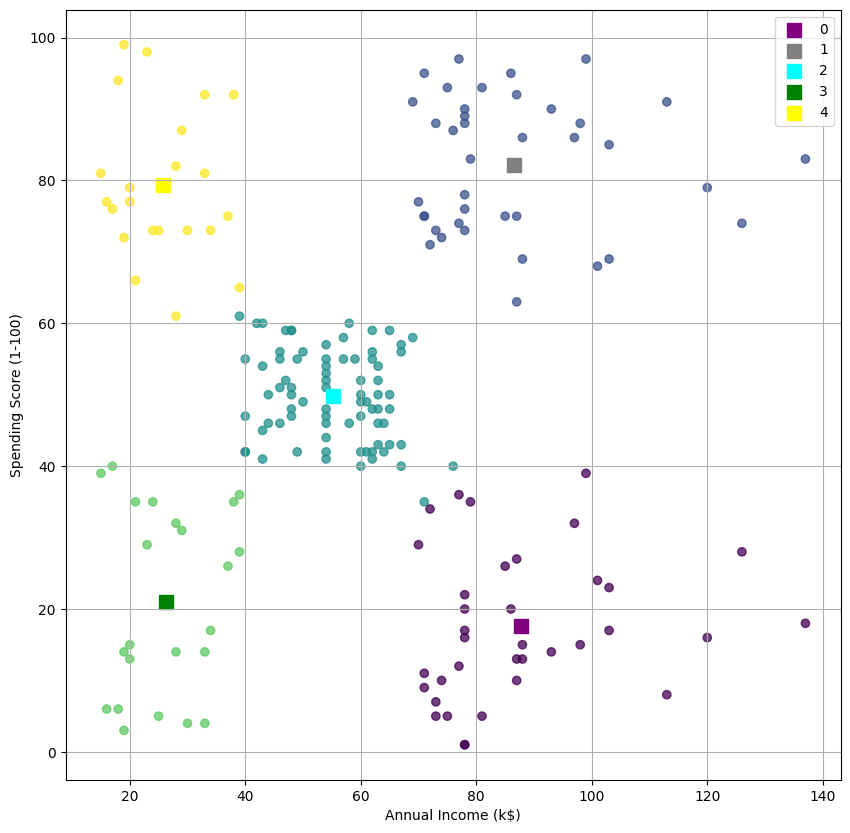

In [ ]:
plt.figure(figsize=(10,10))
color = ['purple', 'gray', 'cyan', 'green', 'yellow']
# Tạo dữ liệu cho biểu đồ 
print(np.array(df.iloc[:,0:2].shape))
data = scaler.inverse_transform(np.array(df.iloc[:,0:2]))
x = data[:,0]
y = data[:,1]

# Vẽ biểu đồ 
plt.scatter(x, y, c=df['centroid'], marker='o', alpha = 0.75, cmap='viridis')
for i in range(len(centroids)):
  plt.scatter(centroids['Annual Income (k$)'].iloc[i] * np.std(data[:,0]) + np.mean(data[:,0]), centroids['Spending Score (1-100)'].iloc[i] * np.std(data[:,1]) + np.mean(data[:,1]), c=color[i], marker='s', s=100, label=i)

# Thêm nhãn cho các trục
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.legend()
plt.grid()
plt.show()


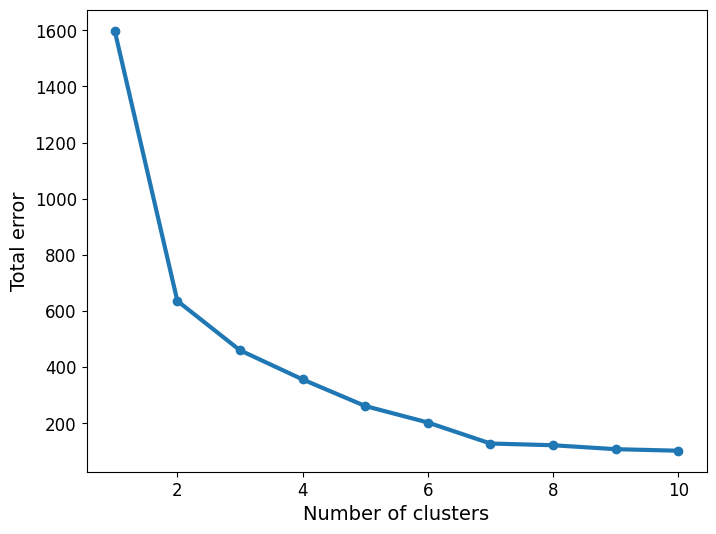

In [ ]:
err_total = []
n = 10

df_elbow = df

for i in range(n):
    _, my_errs, _ = kmeans(df_elbow, i+1)
    err_total.append(sum(my_errs))
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,n+1), err_total, linewidth=3, marker='o')
ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r'Total error', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()